# K-Mean Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def generate_data(mu, var, m, print_data):
    x = []
    y = []
    for i in range(len(mu)):
        x_= np.random.normal(mu[i][0], var[i][0], int(m/len(mu)))
        y_= np.random.normal(mu[i][1], var[i][1], int(m/len(mu)))
        x = np.concatenate((x,x_),axis=0)
        y = np.concatenate((y,y_),axis=0)
    if print_data:
        plt.scatter(x,y,c='coral',marker='.')
        plt.show()
    return x,y

def dist(k,x,y):
    return np.sqrt((x-k[0])**2 + (y-k[1])**2)

def random_centroid(x,y,k,print_data):
    centroids = []
    for i in range(k):
        rand_x = np.random.uniform(min(x),max(x))
        rand_y = np.random.uniform(min(y),max(y))
        centroids.append([rand_x,rand_y])
    centroids = np.array(centroids)
    if print_data:
        plt.scatter(x,y,c='coral',marker='.')
        plt.scatter(centroids[:,0],centroids[:,1],c='m',marker='*')
        plt.show()
    return centroids

def clustering(x,y,centroids):
    clusters = {}
    for k in range(len(centroids)):
        clusters[k] = []
    for i in range(len(x)):
        dists = []
        for k in range(len(centroids)):
            dists.append(dist(centroids[k],x[i],y[i]))    
        clusters[np.argmin(dists)].append([x[i],y[i]])
    for k in range(len(centroids)):
        clusters[k] = np.array(clusters[k])
    return clusters

def update_centroids(centroids,clusters): 
    new_centroids = np.zeros((len(centroids),2))
    col = ['pink','green','cyan','coral']
    mark = ['^','.','v','>']
    for k in range(len(centroids)):
        new_centroids[k] = [np.sum(clusters[k][:,0])/len(clusters[k]), np.sum(clusters[k][:,1])/len(clusters[k])]
        plt.scatter(clusters[k][:,0],clusters[k][:,1],c=col[k],marker=mark[k])
    plt.scatter(new_centroids[:,0],new_centroids[:,1],c='m',marker='*')
    plt.show()
    return new_centroids

### Create random dataset

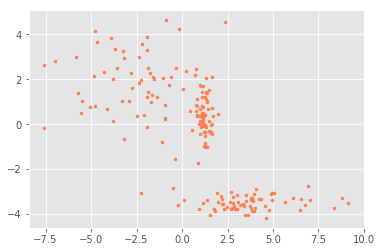

In [10]:
mu = []
std_dev = []
m = 200
G = int(np.random.uniform(2,4))
for g in range(G):
    mu.append([np.random.uniform(-4,5),np.random.uniform(-4,5)])
    std_dev.append([np.random.uniform(.2,3),np.random.uniform(.2,3)])


x_train,y_train = generate_data(mu, std_dev, m, print_data = True)

### Initialise centroids and run K-Mean

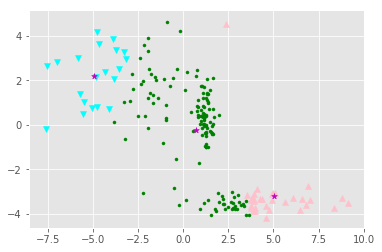

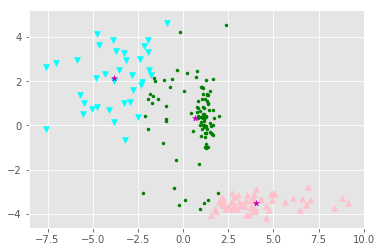

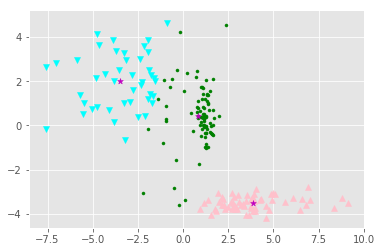

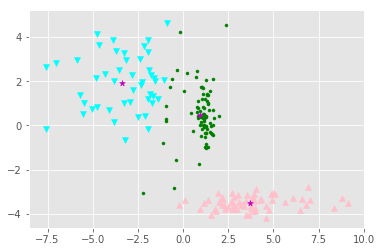

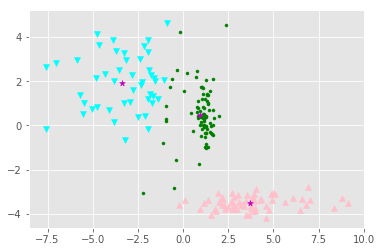

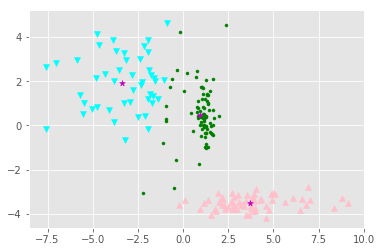

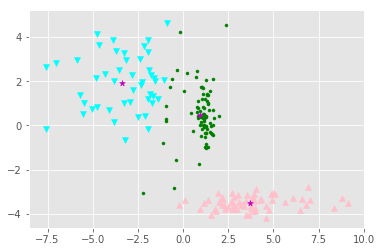

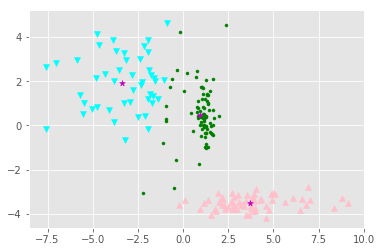

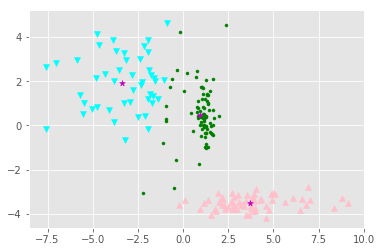

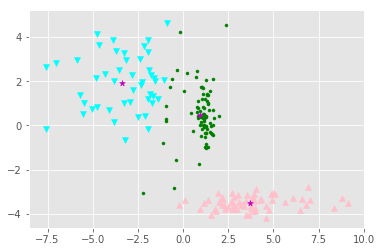

In [13]:
centroids = random_centroid(x_train,y_train,k=3,print_data=False)
epochs = 10
for i in range(epochs):
    clusters = clustering(x_train,y_train,centroids)
    centroids = update_centroids(centroids,clusters)

In [ ]:
def predict(data,centroids):
    x = data[0]
    y = data[1]
    dists = []
    for k in range(len(centroids)):
        dists.append(dist(centroids[k],x,y))
    return np.argmin(dists)

In [ ]:
test_data = [4,7]
predict(test_data,centroids)